In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from xmovie import Movie
import seawater as sw
import cmocean as cm
import proplot as pplt
import matplotlib.patheffects as PathEffects
from tqdm import tqdm
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
km1 = xr.open_dataset("data/output_1km.nc").load()
km1 = km1.assign_coords(time=km1.time.astype("float")*1e-9/86400-1).sel(time=slice(0,None))

In [4]:
coarse = xr.open_dataset("data/output_coarse.nc").load()
coarse = coarse.assign_coords(time=coarse.time.astype("float")*1e-9/86400)

In [4]:
coarse_mle = xr.open_dataset("data/output_coarsened_mle.nc").load()
coarse_mle = coarse_mle.assign_coords(time=coarse_mle.time.astype("float")*1e-9/86400)

In [46]:
coarse_mle = coarse_mle.interp(zF=coarse_mle.zC, xF=coarse_mle.xC, yF=coarse_mle.yC)

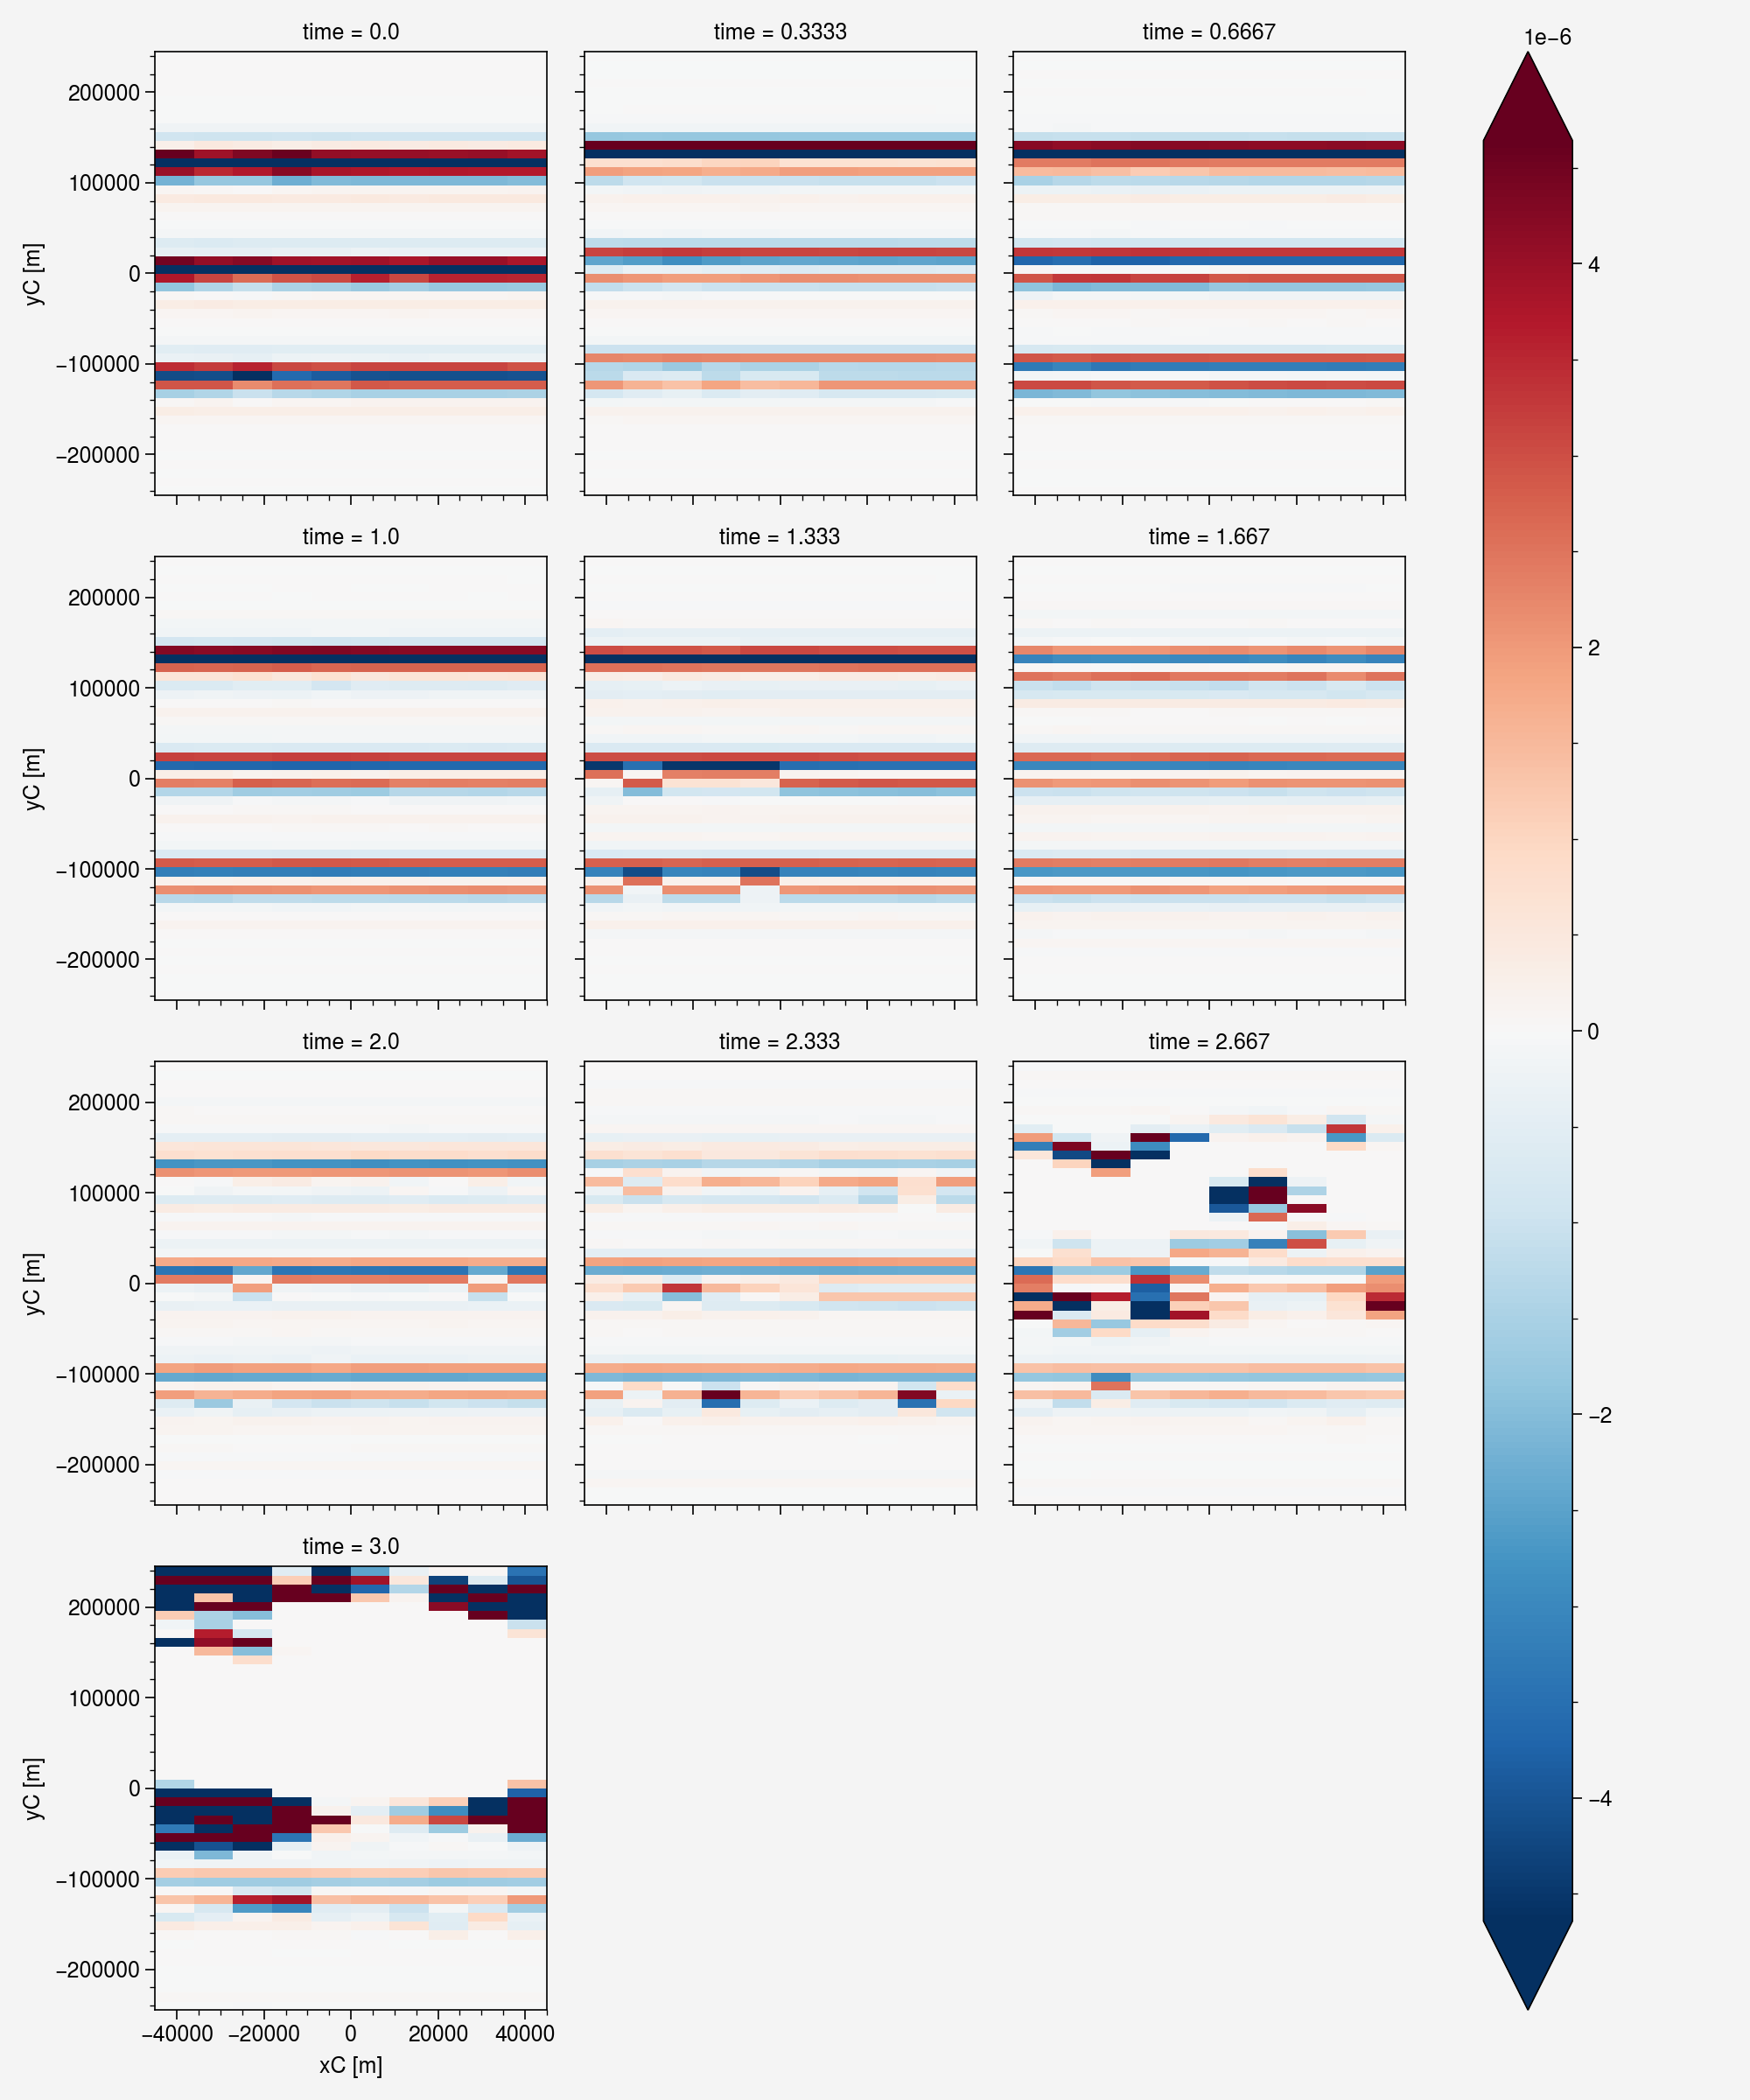

In [56]:
div = coarse_mle.v_mle.differentiate("yC")+coarse_mle.w_mle.differentiate("zC")
div.sel(zC=0, method="nearest").plot(col="time", col_wrap=3, robust=True)

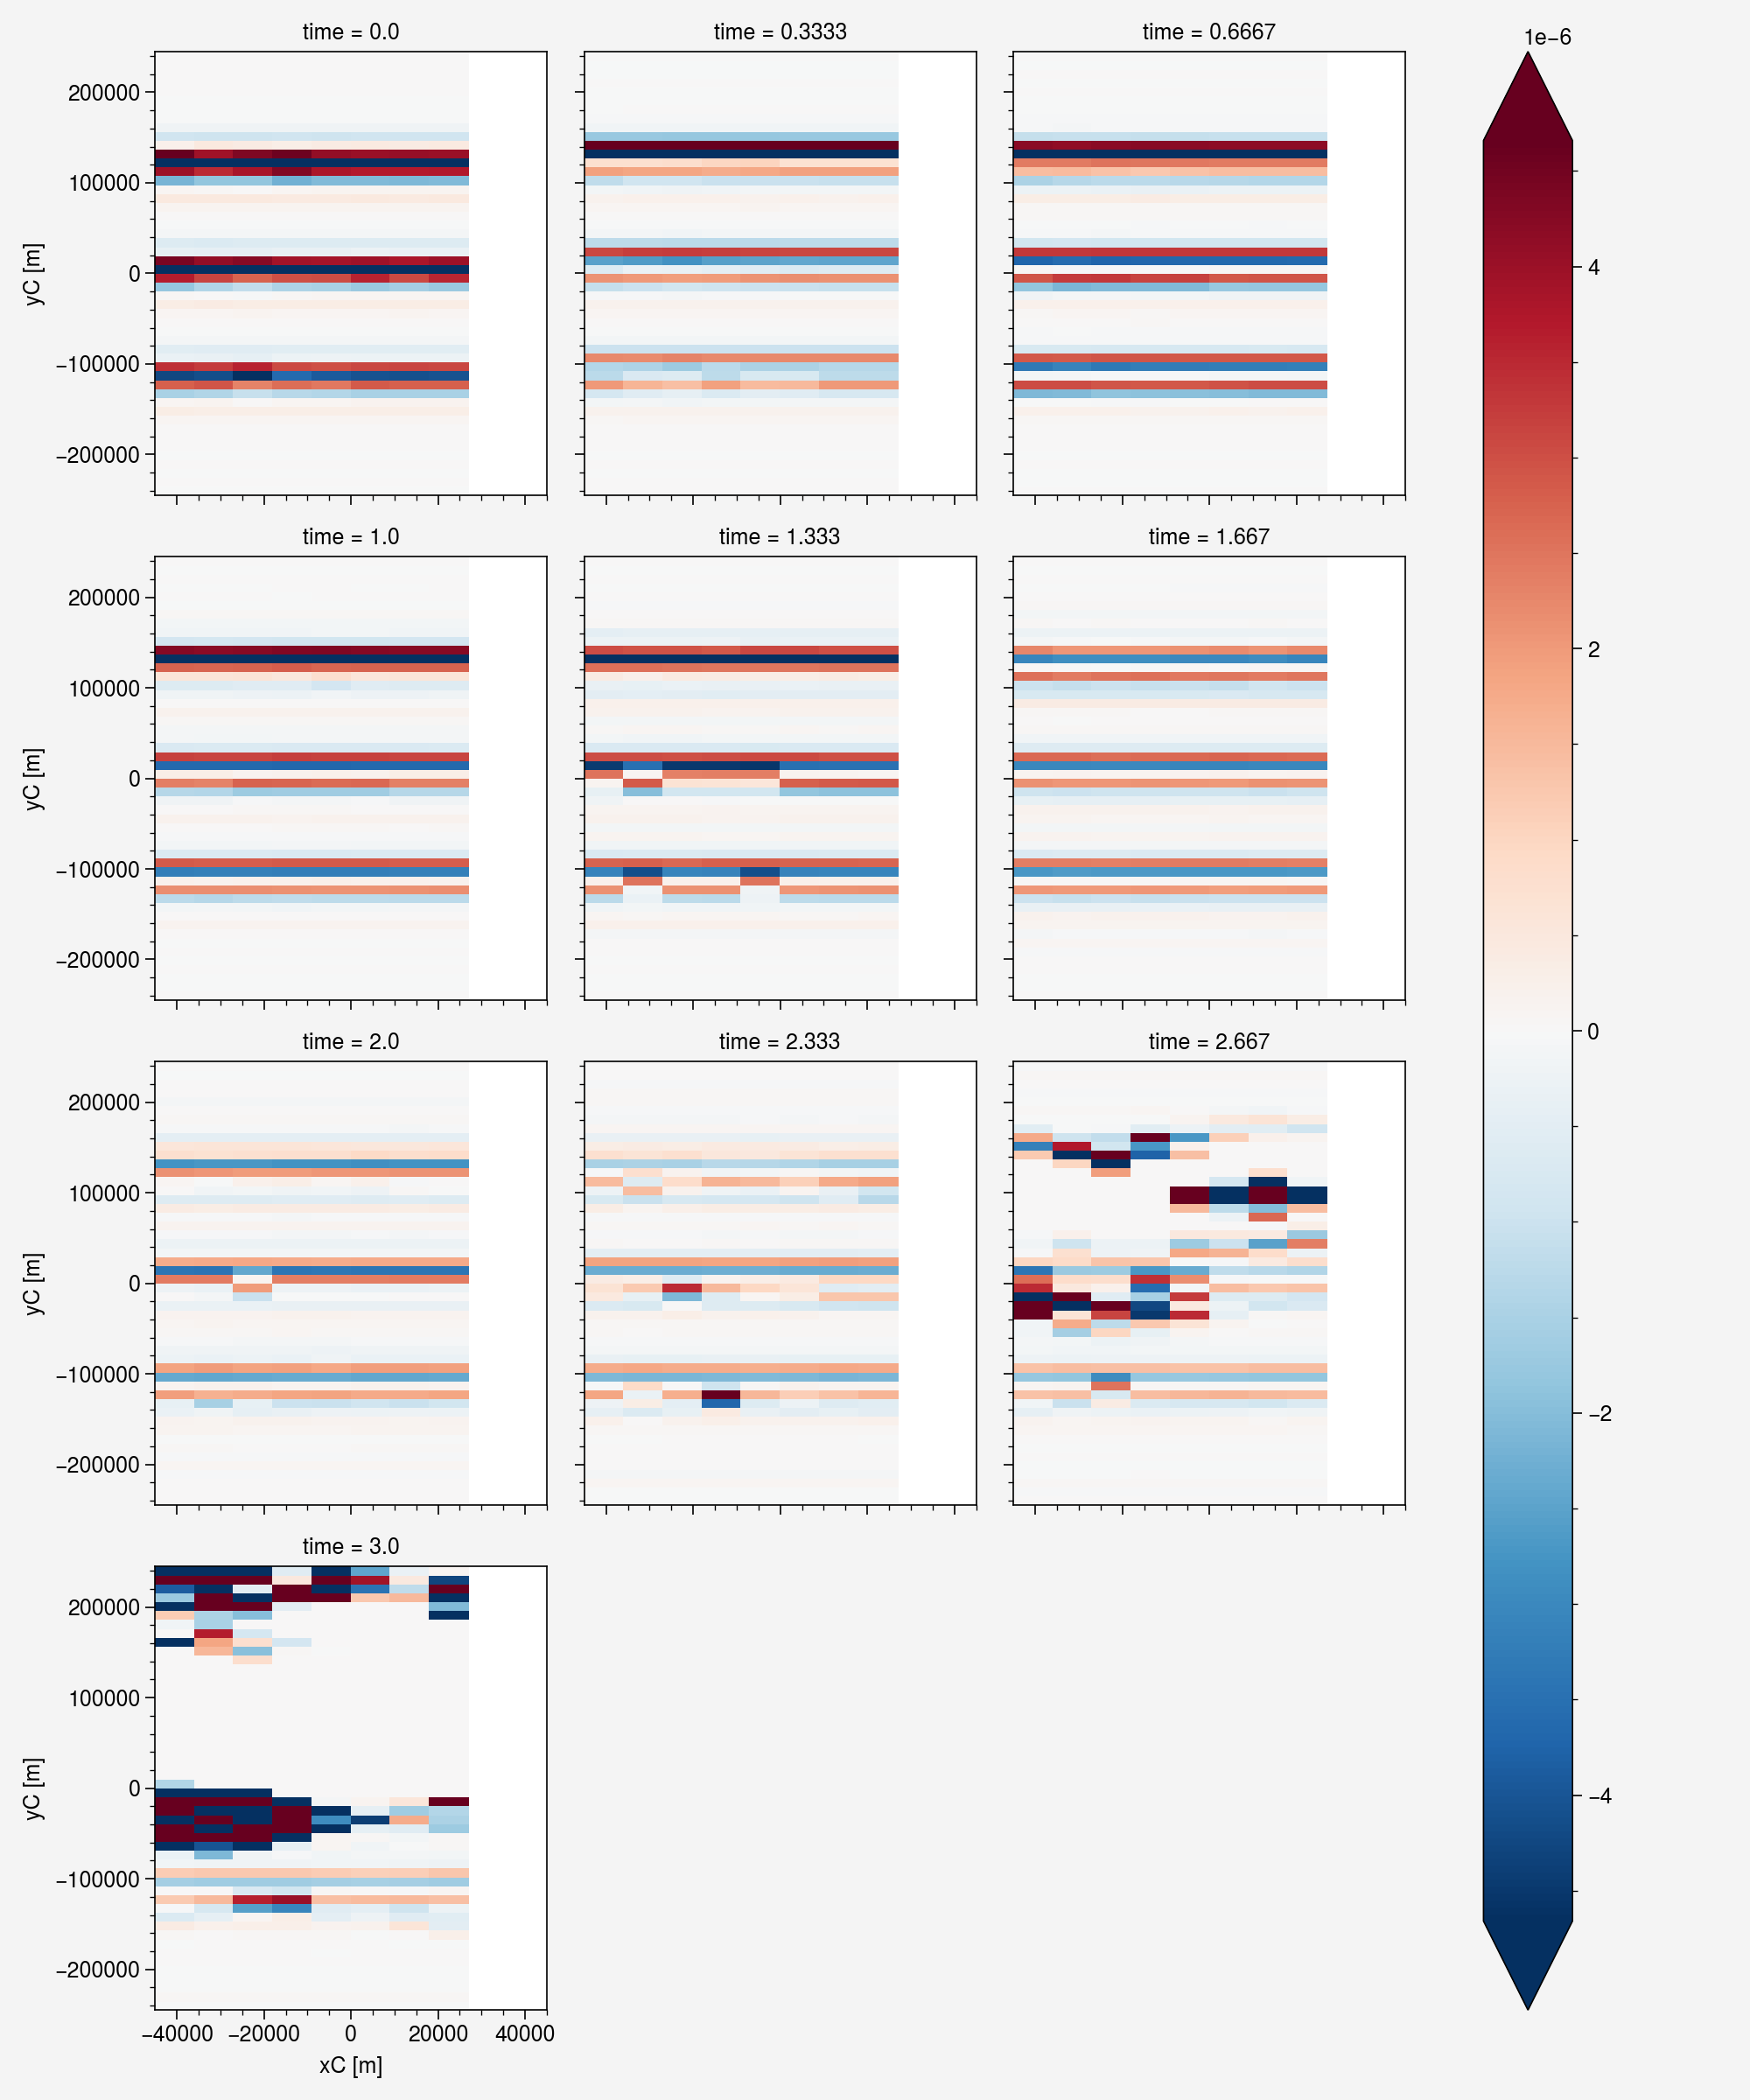

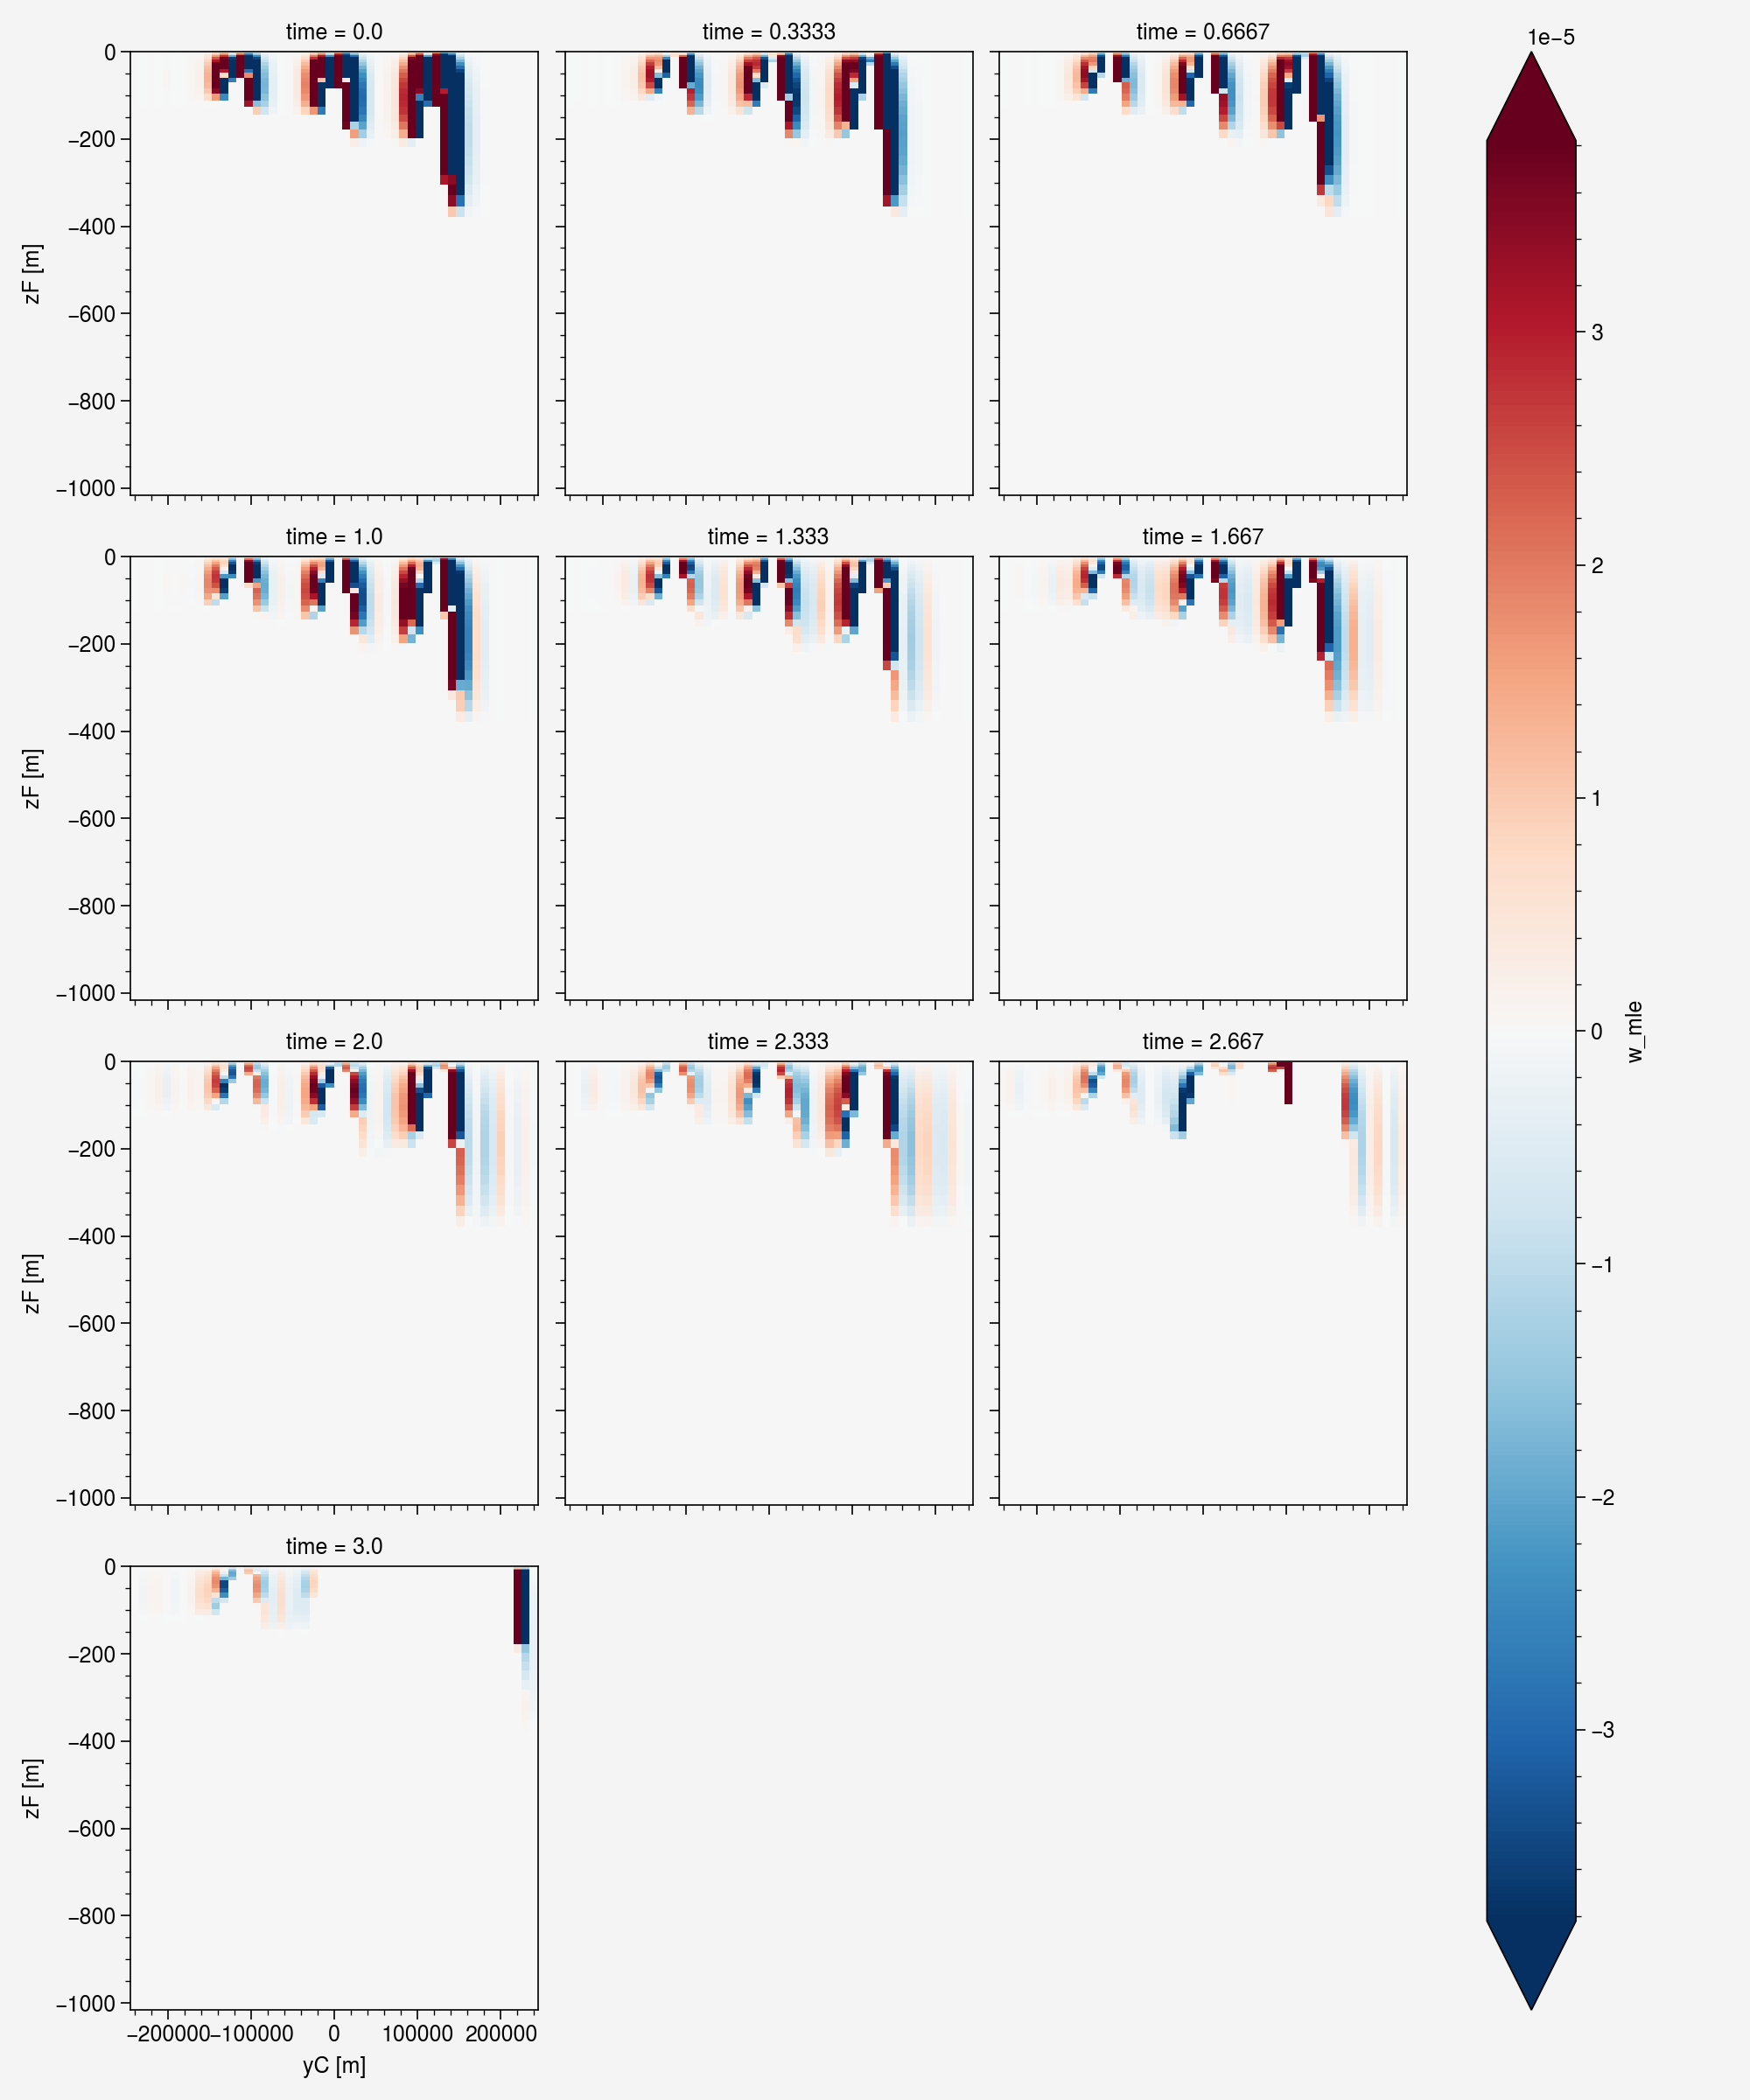

In [41]:
coarse_mle.w_mle.sel(xC=0, method="nearest").plot(col="time", col_wrap=3, robust=True)

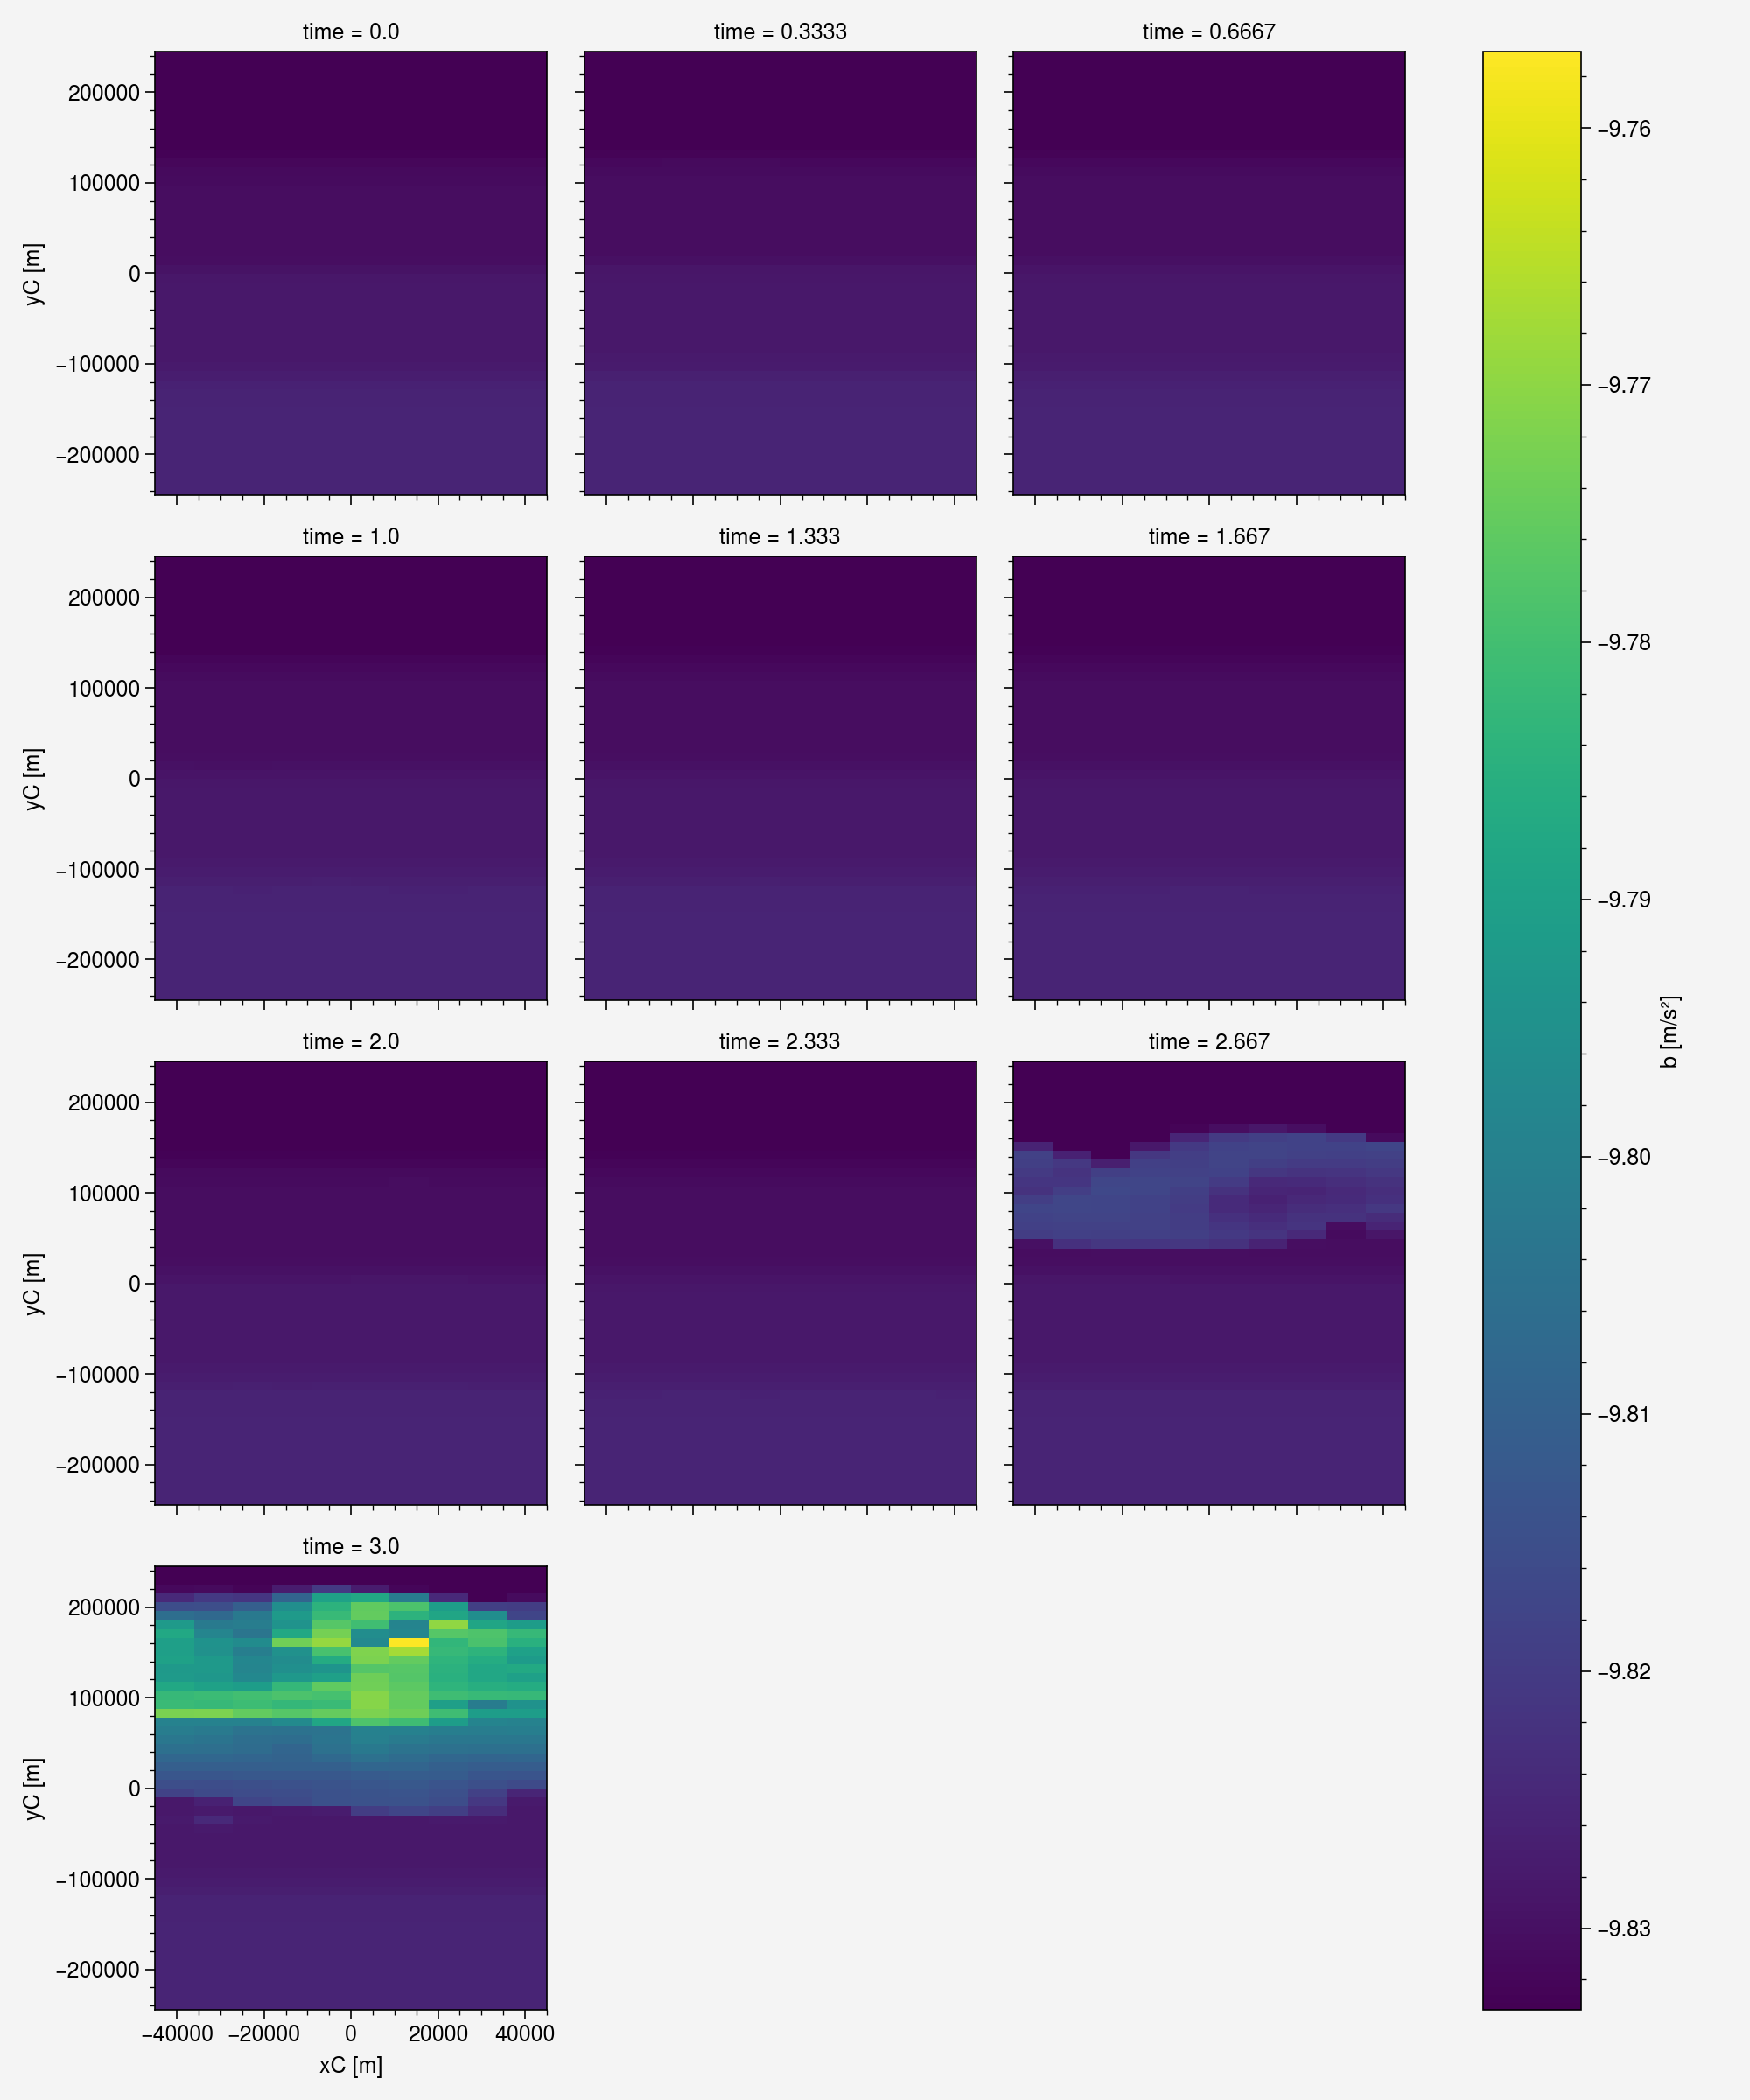

In [34]:
coarse_mle.b.sel(zC=0, method="nearest").plot(col="time", col_wrap=3)

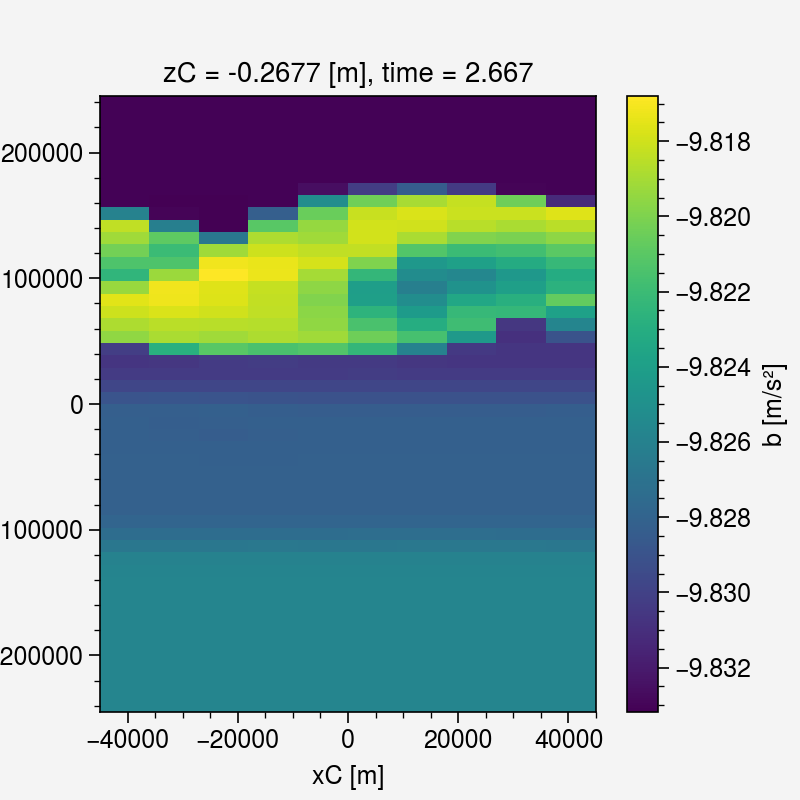

In [31]:
ds = coarse_mle.isel(time=8)
# ds.b.differentiate("yC").sel(zC=0, method="nearest").plot()
ds.b.sel(zC=0, method="nearest").plot()

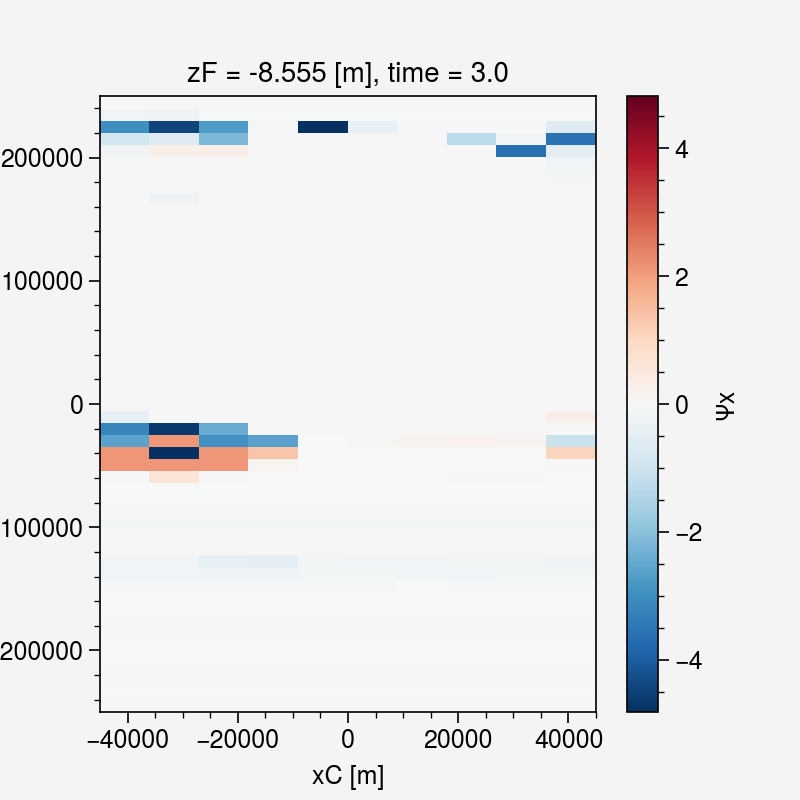

In [16]:
coarse_mle.Ψx.isel(time=-1).sel(zF=-10, method="nearest").plot()

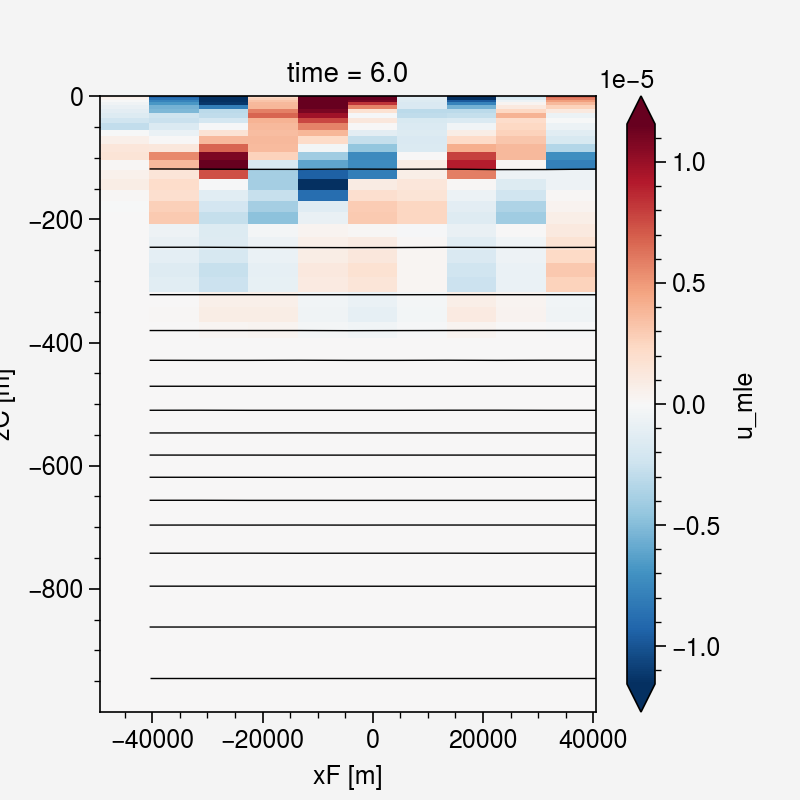

In [60]:
ti = 18
coarse_mle.isel(time=ti).b.mean("yC").plot.contour(levels=20, colors="k", linewidths=0.5, linestyles="-")
coarse_mle.isel(time=ti).u_mle.mean("yC").plot(robust=True)

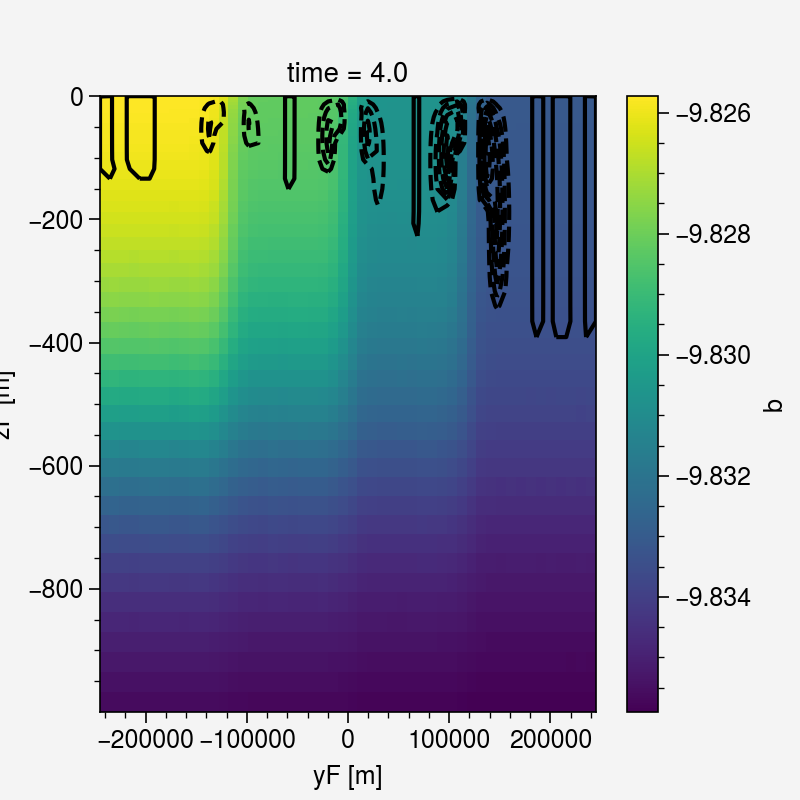

In [27]:
ti = 12
coarse_mle.isel(time=ti).b.mean("xC").plot()
coarse_mle.isel(time=ti).Ψx.mean("xC").plot.contour(levels=20,colors="k")

In [7]:
yslice = slice(-150e3,150e3)
km1_N2 = km1.b.differentiate("zC").sel(yC=yslice).mean(["xC","yC"])
coarse_N2 = coarse.b.differentiate("zC").sel(yC=yslice).mean(["xC","yC"])

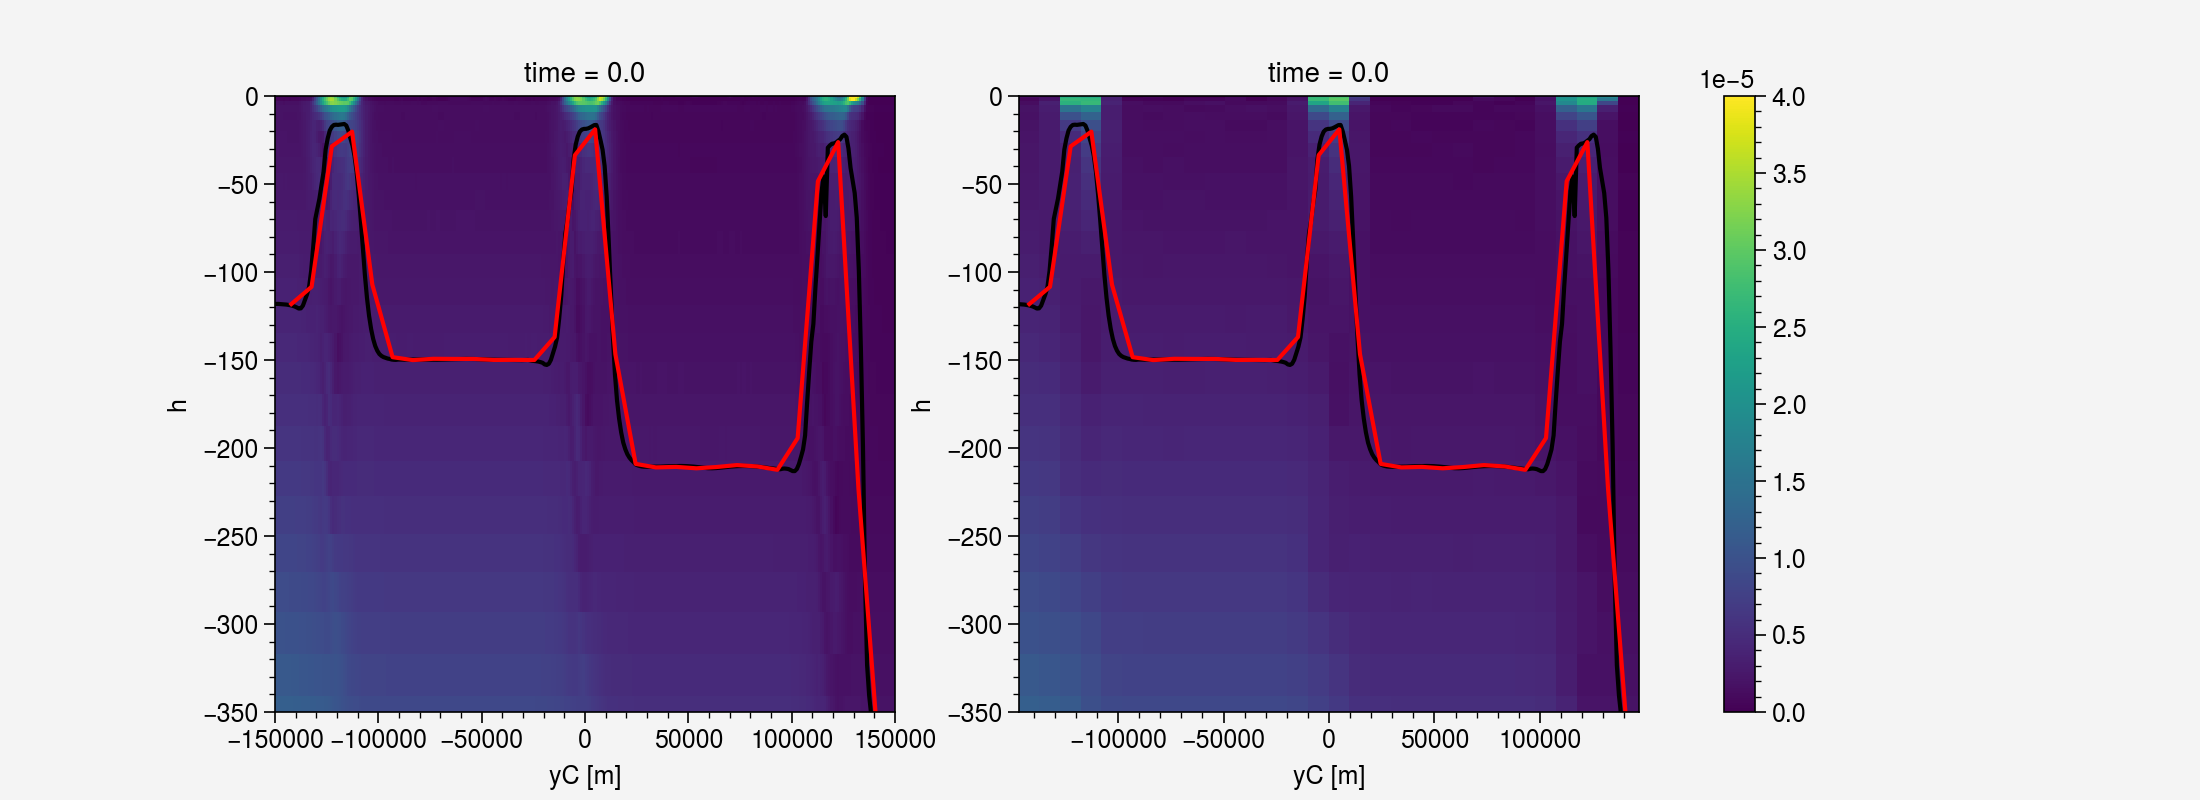

In [8]:
yslice = slice(-150e3,150e3)
ti = 0 #days
kw = dict(vmin=0, vmax=4e-5, add_colorbar=False)

fig,ax = plt.subplots(1,2, figsize=(11,4))

km1.sel(yC=yslice).sel(time=ti, method="nearest").b.differentiate("zC").mean("xC").plot(ax=ax[0], **kw)
(-km1.h).sel(yC=yslice).sel(time=ti, method="nearest").mean(["xC"]).plot(color="k", label="1 km", ax=ax[0])
(-coarse.h).sel(yC=yslice).sel(time=ti, method="nearest").mean(["xC"]).plot(color="red", label="1 km", ax=ax[0])

C = coarse.sel(yC=yslice).sel(time=ti, method="nearest").b.differentiate("zC").mean("xC").plot(ax=ax[1], **kw)
(-km1.h).sel(yC=yslice).sel(time=ti, method="nearest").mean(["xC"]).plot(color="k", label="1 km", ax=ax[1])
(-coarse.h).sel(yC=yslice).sel(time=ti, method="nearest").mean(["xC"]).plot(color="red", label="1 km", ax=ax[1])

fig.colorbar(C, ax=ax)

_ = [a.set(ylim=[-350,0]) for a in ax]

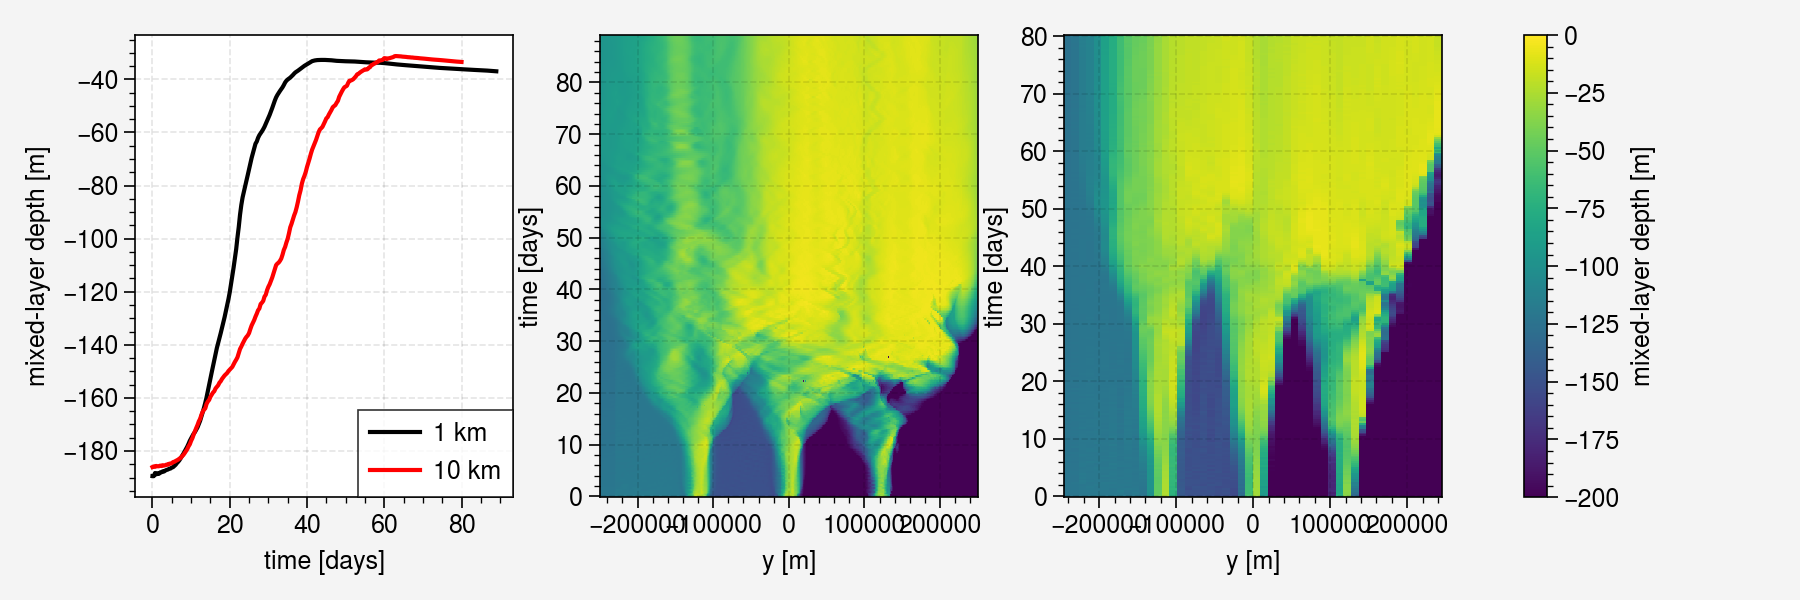

In [7]:
yslice = slice(-250e3,250e3)

kw = dict(vmin=-200, vmax=0, cmap="viridis", add_colorbar=False)

fig,ax = plt.subplots(1, 3, figsize=(9,3))


(-km1.h).sel(yC=yslice).mean(["xC", "yC"]).plot(color="k", label="1 km", ax=ax[0])
(-coarse.h).sel(yC=yslice).mean(["xC", "yC"]).plot(color="red", label="10 km", ax=ax[0])

ax[0].legend()
ax[0].set(
    ylabel="mixed-layer depth [m]",
    xlabel="time [days]"
)

C = (-km1.h).sel(yC=yslice).mean("xC").plot(ax=ax[1], **kw)
(-coarse.h).sel(yC=yslice).mean("xC").plot(ax=ax[2], **kw)

fig.tight_layout()
fig.colorbar(C, ax=ax, label="mixed-layer depth [m]")

ax[1].set(
    xlabel="y [m]",
    ylabel="time [days]"
)
ax[2].set(
    xlabel="y [m]",
    ylabel="time [days]"
)


_ = [a.grid(True, linestyle="--") for a in ax]


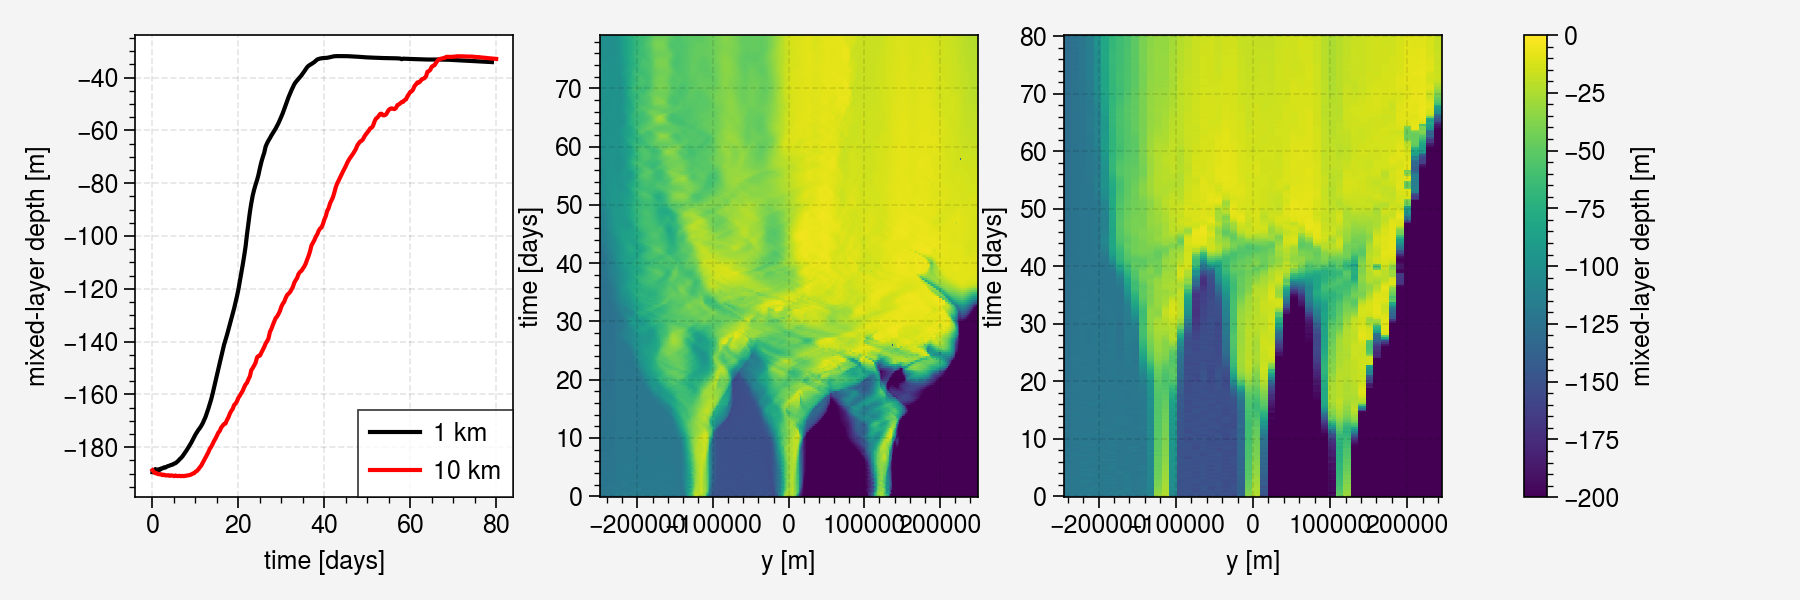

In [61]:
yslice = slice(-250e3,250e3)

kw = dict(vmin=-200, vmax=0, cmap="viridis", add_colorbar=False)

fig,ax = plt.subplots(1, 3, figsize=(9,3))


(-km1.h).sel(yC=yslice).mean(["xC", "yC"]).plot(color="k", label="1 km", ax=ax[0])
(-coarse.h).sel(yC=yslice).mean(["xC", "yC"]).plot(color="red", label="10 km", ax=ax[0])

ax[0].legend()
ax[0].set(
    ylabel="mixed-layer depth [m]",
    xlabel="time [days]"
)

C = (-km1.h).sel(yC=yslice).mean("xC").plot(ax=ax[1], **kw)
(-coarse.h).sel(yC=yslice).mean("xC").plot(ax=ax[2], **kw)

fig.tight_layout()
fig.colorbar(C, ax=ax, label="mixed-layer depth [m]")

ax[1].set(
    xlabel="y [m]",
    ylabel="time [days]"
)
ax[2].set(
    xlabel="y [m]",
    ylabel="time [days]"
)


_ = [a.grid(True, linestyle="--") for a in ax]


In [16]:
def custom_plotfunc(ds, fig, tt, *args, **kwargs):
    
    fig.subplots_adjust(hspace=0.0)

    fig.set_size_inches((8,7.5))

    zi = -60
    f = sw.f(60)

    kw = dict(
        Ro = dict(vmin=-1.5,vmax=1.5,cmap=pplt.Colormap("Div"),add_colorbar=False),
        w = dict(vmin=-1,vmax=1,cmap=pplt.Colormap("ColdHot"),add_colorbar=False),
        rho = dict(levels=np.arange(1020,1028,0.1),colors="0.1",linewidths=1,alpha=0.5),
        N2 = dict(vmin=0,vmax=2.e-5,cmap=pplt.Colormap("thermal"),add_colorbar=False)
    )

    ax = fig.subplot_mosaic([
        ["Ro_km1","Ro_km1","w_km1","w_km1","Ro_coarse","Ro_coarse","w_coarse","w_coarse"],
        ["Ro_km1","Ro_km1","w_km1","w_km1","Ro_coarse","Ro_coarse","w_coarse","w_coarse"],
        ["N2_km1","N2_km1","N2_km1","N2_km1","N2_coarse","N2_coarse","N2_coarse","N2_coarse"]
    ])

    name = dict(km1 = "1 km", coarse = "10 km")
    for i,sim in enumerate(ds):
        dsi = ds[sim].isel(time=tt).interp(xF=ds[sim].xC,yF=ds[sim].yC,zF=ds[sim].zC)
        dsi = dsi.assign(N2=dsi.b.differentiate("zC"))

        gradb = np.abs((dsi.b.differentiate("xC")+dsi.b.differentiate("yC")))
        zeta = (dsi.v.differentiate("xC")-dsi.u.differentiate("yC"))

        dsi = dsi.assign(
            w = dsi.w*1e3,
            Ro = zeta/f,
            dvdz = dsi.v.differentiate("zC"),
            pv = ((f+zeta)*dsi.N2 - (gradb**2)/f)*1e9,
            Ri = dsi.N2/(dsi.v.differentiate("zC")**2+dsi.u.differentiate("zC")**2),
            S = np.sqrt((dsi.u.differentiate("xC")-dsi.v.differentiate("yC"))**2 + (dsi.v.differentiate("xC")+dsi.u.differentiate("yC"))**2)/f,
        )

        dsi = dsi.assign_coords(xC=dsi.xC*1e-3,yC=dsi.yC*1e-3).sel(yC=slice(-150,150))

        C = dict()
        for p in ["Ro", "w"]:
            C[p] = dsi[p].sel(zC=zi, method="nearest").plot(ax=ax[f"{p}_{sim}"],**kw[p])

            (-(1026/9.82)*dsi["b"]).sel(zC=zi, method="nearest").plot.contour(ax=ax[f"{p}_{sim}"],**kw["rho"])

            ax[f"{p}_{sim}"].set(
                ylim=[-150,150],
                xlabel="x [km]",
                title="",
            )

            ax[f"{p}_{sim}"].axvline(0,lw=1.5,ls="--",color="0.1")

            txt = ax[f"{p}_{sim}"].text(0.05,1.03,name[sim],fontsize=10,va="center",fontweight="bold",transform=ax[f"{p}_{sim}"].transAxes)
            txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='w')])

        (-(1026/9.82)*dsi["b"]).sel(xC=0, method="nearest").plot.contour(ax=ax[f"N2_{sim}"],**kw["rho"])
        C["N2"] = dsi["N2"].sel(xC=0, method="nearest").plot(ax=ax[f"N2_{sim}"],**kw["N2"])
        (-dsi.h).sel(xC=0, method="nearest").plot(ax=ax[f"N2_{sim}"], color="red")

        ax[f"N2_{sim}"].axhline(zi,lw=1.5,ls="--",color="0.1") 
        ax[f"N2_{sim}"].set(
            title="",
            xlabel="y [km]",
            ylabel="z [m]",
            ylim=[-500, 0],
        )

        txt = ax[f"N2_{sim}"].text(0.03,1.05,name[sim],fontsize=10,va="center",fontweight="bold",transform=ax[f"N2_{sim}"].transAxes)
        txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='w')])

    kw_colorbar = dict(orientation="horizontal", shrink=0.6)
    fig.colorbar(C["Ro"], ax=[ax[k] for k in ["Ro_km1", "w_km1"]], label="Ro", **kw_colorbar)
    fig.colorbar(C["w"], ax=[ax[k] for k in ["Ro_coarse", "w_coarse"]], label="w [mm/s]", **kw_colorbar)

    kw_colorbar["shrink"] = 0.3
    fig.colorbar(C["N2"], ax=[ax[k] for k in ["N2_km1", "N2_coarse"]], label="N$^{-1}$ [s$^{-2}$]", **kw_colorbar)

    title = f"{ds[sim].isel(time=tt).time.values:.2f} days  {-zi:.0f} m"
    ax[f"N2_{sim}"].text(0.5, 0.92, title, fontweight="bold", fontsize=11, ha="center", transform=fig.transFigure)

    ax[f"N2_{sim}"].set(ylabel="", yticklabels=[])

    ax["Ro_km1"].set(ylabel="y [km]")
    ax["w_km1"].set(ylabel="", yticklabels=[])
    ax["Ro_coarse"].set(ylabel="", yticklabels=[])
    ax["w_coarse"].set(ylabel="", yticklabels=[])
    _ = [ax[k].grid(True,ls="--",alpha=0.5) for k in ax]
    
    return None, None


In [17]:
ds = dict(km1=km1, coarse=coarse)
plt.ioff()
for tt in tqdm(range(ds["km1"].time.size)):
    fig = plt.figure()
    custom_plotfunc(ds, fig, tt)

    fig.savefig(f"img/{tt:06d}.png", bbox_inches='tight')
    plt.close()

100%|████████████████████████████████████████████████████████████████████████| 211/211 [20:27<00:00,  5.82s/it]
